In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
mtcars=pd.read_csv('C:/Users/vijay/Desktop/krupa/GL/SLR/mtcars.csv')
mtcars=mtcars.set_index('model')
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [4]:
mtcars.shape

(32, 11)

In [5]:
mtcars.size

352

In [6]:
mtcars['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

<Figure size 1152x1008 with 0 Axes>

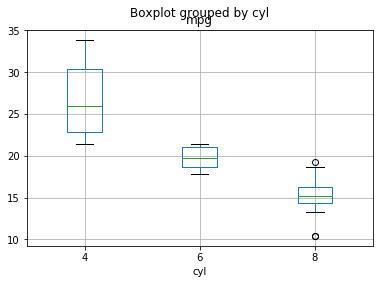

In [11]:
plt.figure(figsize=(16,14))
mtcars.boxplot(column='mpg',by='cyl')

In [12]:
mtcars['vs'].value_counts()

0    18
1    14
Name: vs, dtype: int64

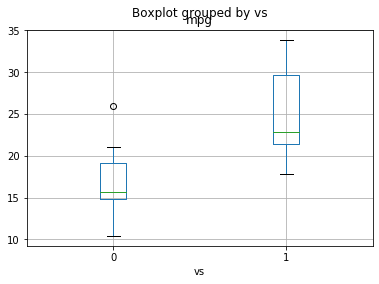

In [13]:
mtcars.boxplot(column='mpg',by='vs')

In [14]:
mtcars['am'].value_counts()

0    19
1    13
Name: am, dtype: int64

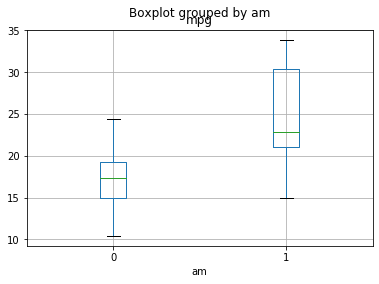

In [15]:
mtcars.boxplot(column='mpg',by='am')

In [16]:
mtcars['gear'].value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

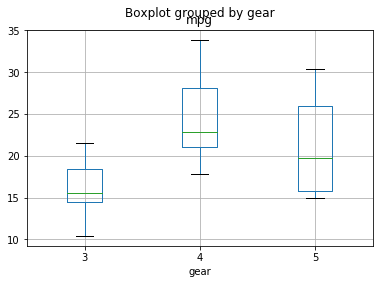

In [17]:
mtcars.boxplot(column='mpg',by='gear')

In [18]:
mtcars['carb'].value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

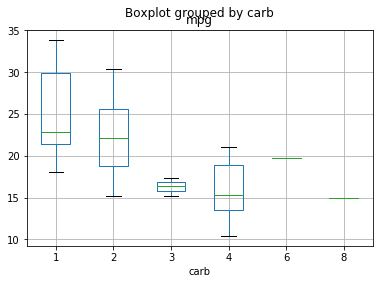

In [19]:
mtcars.boxplot(column='mpg',by='carb')

In [20]:
df=mtcars.copy()

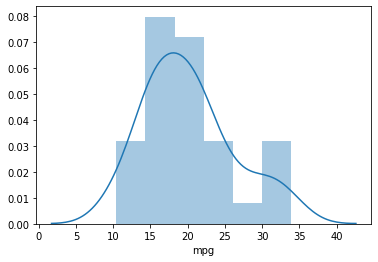

In [21]:
sns.distplot(df['mpg'])

In [29]:
df.corr()['mpg']

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
Name: mpg, dtype: float64

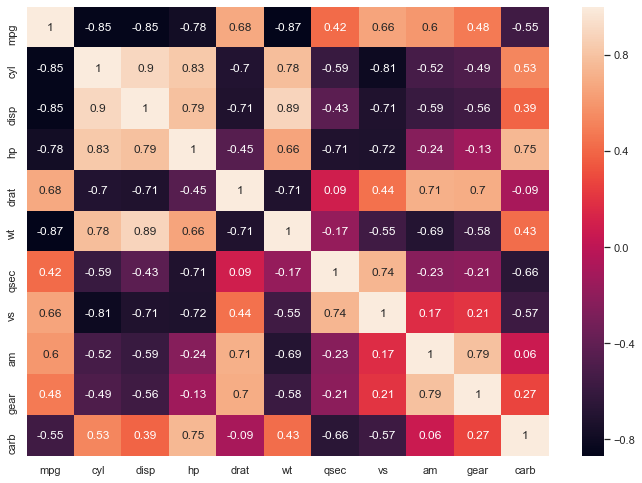

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [24]:
df.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [25]:
df['mpg'].describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

In [26]:
abs(df.corr()['mpg']).sort_values()

qsec    0.418684
gear    0.480285
carb    0.550925
am      0.599832
vs      0.664039
drat    0.681172
hp      0.776168
disp    0.847551
cyl     0.852162
wt      0.867659
mpg     1.000000
Name: mpg, dtype: float64

In [27]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV,LassoCV,Ridge,Lasso

In [28]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [32]:
pd.set_option('display.max_columns', None)
col=['cyl','vs','am','gear','carb']
df_final=pd.get_dummies(data=df,columns=col)
df_final.head()

,mpg,disp,hp,drat,wt,qsec,cyl_4,cyl_6,cyl_8,vs_0,vs_1,am_0,am_1,gear_3,gear_4,gear_5,carb_1,carb_2,carb_3,carb_4,carb_6,carb_8
model,,,,,,,,,,,,,,,,,,,,,,
Mazda RX4,21.0,160.0,110,3.90,2.620,16.46,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0
Mazda RX4 Wag,21.0,160.0,110,3.90,2.875,17.02,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0
Datsun 710,22.8,108.0,93,3.85,2.320,18.61,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0
Hornet 4 Drive,21.4,258.0,110,3.08,3.215,19.44,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0
Hornet Sportabout,18.7,360.0,175,3.15,3.440,17.02,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0


In [33]:
x=df_final.drop('mpg',axis=1)
y=df_final['mpg']

In [34]:
LR=LinearRegression()
LR.fit(x,y)
print(f'Coefficients: {LR.coef_}')
print(f'Intercept: {LR.intercept_}')
print(f'R^2 score: {LR.score(x, y)}')

Coefficients: [ 0.03554632 -0.07050683  1.18283018 -4.52977584  0.36784482  0.99495275
 -1.65374252  0.65878977 -0.96542527  0.96542527 -0.60605785  0.60605785
 -1.21425031 -0.09989537  1.31414568 -2.4732813  -3.45263562  0.52635745
 -1.38185841  2.00428791  4.77712996]
Intercept: 28.143194414685496
R^2 score: 0.8930749320864843


#### Check if it is over fitting or underfitting
If R_square of train>R_square of test= overfitting

If R_square of train<R_square of test= underfitting

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 21)
(10, 21)
(22,)
(10,)


In [36]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(f'R^2 score for train: {LR.score(x_train, y_train)}')
y_pred=LR.predict(x_test)
LR.fit(x_test,y_pred)
print(f'R^2 score for test: {LR.score(x_train, y_train)}')

R^2 score for train: 0.9577712483239683
R^2 score for test: 0.3517070776847987


#### Since R_square of train>R_square of test= overfitting

In [37]:
x_const=sm.add_constant(x)
model=sm.OLS(y,x_const).fit()
pred=model.predict(x_const)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     7.830
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           0.000124
Time:                        19:00:15   Log-Likelihood:                -66.608
No. Observations:                  32   AIC:                             167.2
Df Residuals:                      15   BIC:                             192.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9329      6.738      1.474      0.161      -4.429      24.295
disp           0.0355      0.032      1.114      0.283      -0.032       0.104
hp            -0.0705      0.039     -1.788      0.094      -0.155       0.014
drat           1.1828      2.483      0.476      0.641      -4.111       6.476
wt            -4.5298      2.539     -1.784      0.095      -9.941       0.881
qsec           0.3678      0.935      0.393      0.700      -1.626       2.362
cyl_4          4.3059      4.492      0.959      0.353      -5.268      13.880
cyl_6          1.6572      2.396      0.692      0.500      -3.449       6.763
cyl_8          3.9698      4.412      0.900      0.383      -5.435      13.375
vs_0           4.0010      3.374      1.186      0.254      -3.191      11.193
vs_1           5.9319      3.929      1.510      0.152      -2.443      14.307
am_0           4.3604      4.248      1.026      0.321      -4.694      13.414
am_1           5.5725      3.134      1.778      0.096      -1.107      12.252
gear_3         2.0967      2.759      0.760      0.459      -3.785       7.978
gear_4         3.2111      3.376      0.951      0.357      -3.984      10.406
gear_5         4.6251      2.985      1.550      0.142      -1.736      10.987
carb_1        -0.8178      3.615     -0.226      0.824      -8.522       6.887
carb_2        -1.7972      2.812     -0.639      0.532      -7.790       4.196
carb_3         2.1818      3.042      0.717      0.484      -4.302       8.665
carb_4         0.2736      2.331      0.117      0.908      -4.695       5.243
carb_6         3.6598      3.791      0.965      0.350      -4.421      11.740
carb_8         6.4326      5.632      1.142      0.271      -5.571      18.436
==============================================================================
Omnibus:                        2.468   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.772
Skew:                           0.576   Prob(JB):                        0.412
Kurtosis:                       3.009   Cond. No.                     1.11e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.41e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Assumpotions: 5

##### 1) Autocorrelation:  Durbin- Watson Test

No Auto correlation.


Test needed : Durbin- Watson Test.

    It's value ranges from 0-4. If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation.          
    If the value ranges from 2-4, it is known as Negative autocorrelation.                                                      
    If the value is exactly 2, it means No Autocorrelation.
For a good linear model, it should have low or no autocorrelation.

##### we can see here the values of dublin watson test (test for normality):  1.861 (POSITIVE AUTO-CORRELATION , Very close to 2)
    
##### From the graph below, we can easily see that there is Positive autocorrelation.

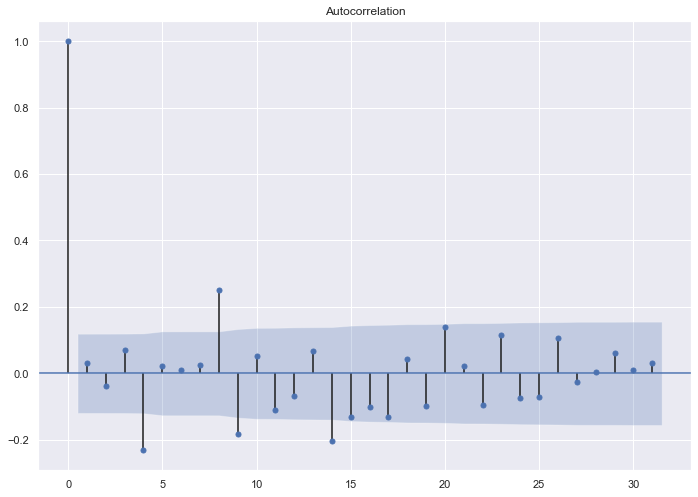

In [64]:
import statsmodels.tsa.api as smt
acf=smt.graphics.plot_acf(model.resid,lags=31,alpha=0.5)
acf.show()

#### 2) Normality of Residuals:Jarque Bera test

The second assumption is the Normality of Residuals. 
For this we prefer the Jarque Bera test. For a good model, the residuals should be normally distributed.
The higher the value of Jarque Bera test , the lesser the residuals are normally distributed.
We generally prefer a lower value of jarque bera test.

The Jarque–Bera test is a goodness-of-fit test of whether sample data 
have the skewness and kurtosis matching a normal distribution.
And jarque-bera test (test for normality) : 1.747
    
The jarque bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.
Note that this test generally works good for large enough number of data samples(>2000) as the test statistics asymptotically has a chi squared distribution with degrees 2 of freedom.


In [67]:
print(stats.jarque_bera(model.resid))

(1.7466576018548141, 0.4175592615519029)


#### 3) Linearity of residuals: Rainbow test,plot the observed values Vs predicted values and plot the Residual Vs predicted values

Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals. OR We can go for rainbow test. Let's look both of them one by one

In [68]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=model,frac=0.5)

(3.8577111479531574, 0.0711971203895364)

In [69]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot

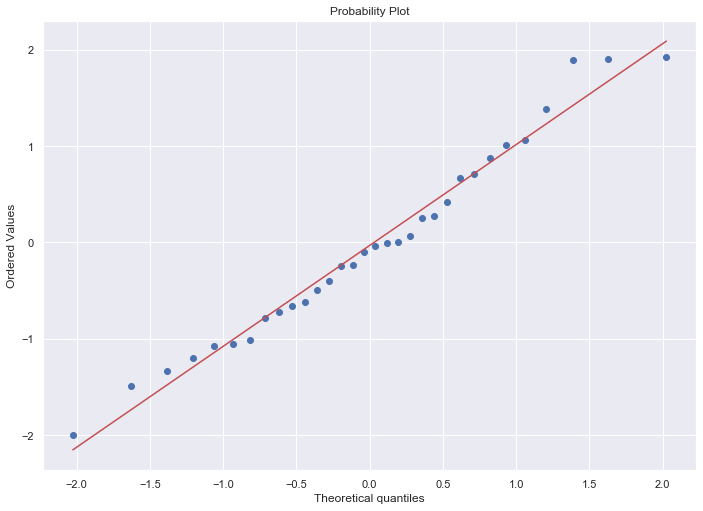

In [72]:
st_residual=model.get_influence().resid_studentized_internal
stats.probplot(st_residual,dist='norm',plot=pylab)
plt.show()

#### If mean value of model residue is zero we can consider that as presence of linearity

In [73]:
model.resid.mean()

2.0128343436454088e-13

#####  Since mean is close to zero linearity is present

#### 4) Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)¶
Homoscedacity :: If the residuals are symmetrically distributed across the trend , then it is called as homoscedacious. Heteroscedacity :: If the residuals are not symmetric across the trend, then it is called as heteroscedacious. In this the residuals can form an arrow shape or any other non symmetrical shape.

In [76]:
import statsmodels.stats.api as sms
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
print(name, test)

['F statistic', 'p-value'] (28.863993040889845, 0.0010748981447214767, 'increasing')


#### 5) MULTI COLLINEARITY : VIF(redundency will increase so is noice)

The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is,
compared with what it would be if that predictor were uncorrelated with the other features in the model.
If no features are correlated, then all values for VIF will be 1.

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(x_const.values,i) for i in range(x_const.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
vif,15.373833,21.620241,9.832037,3.37462,15.164887,7.527958,4.965873,4.648487,5.357452,7.908747


####  There is multicollinearity

#### Feature Selection

In [80]:
## Backward Elimination
cols=list(x.columns)
pmax=1
while(len(cols)>0):
    p=[]
    X=x[cols]
    xc=sm.add_constant(X)
    model=sm.OLS(y,xc).fit()
    p=pd.Series(model.pvalues.values[1:],index=cols)
    pmax=max(p)
    feature_width_p_max=p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_width_p_max)
    else:
        break
selected_features_BE=cols
print(selected_features_BE)

['wt', 'qsec', 'am']


In [86]:
x=df[['wt','qsec','am']]
y=df['mpg']
xc=sm.add_constant(x)
df_model=sm.OLS(y,xc).fit()
df_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.75
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           1.21e-11
Time:                        16:44:08   Log-Likelihood:                -72.060
No. Observations:                  32   AIC:                             152.1
Df Residuals:                      28   BIC:                             158.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6178      6.960      1.382      0.178      -4.638      23.874
wt            -3.9165      0.711     -5.507      0.000      -5.373      -2.460
qsec           1.2259      0.289      4.247      0.000       0.635       1.817
am             2.9358      1.411      2.081      0.047       0.046       5.826
==============================================================================
Omnibus:                        2.574   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.213
Skew:                           0.540   Prob(JB):                        0.331
Kurtosis:                       2.297   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
print('_____________________OR_____________________')

_____________________OR_____________________


In [82]:
## RFE- Recursive Feature Elimination          
from sklearn.feature_selection import RFE
model=LinearRegression()

rfe=RFE(model,len(cols))    
X_rfe=rfe.fit_transform(x,y)
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True False  True False False]
[6 8 7 2 1 1 5 1 4 3]


In [83]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [89]:
x_new=pd.DataFrame(X_rfe)
x_new.columns=cols
x_new.head()

,wt,qsec,am
0,2.620,16.46,1.0
1,2.875,17.02,1.0
2,2.320,18.61,1.0
3,3.215,19.44,0.0
4,3.440,17.02,0.0


In [98]:
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y,test_size=0.3,random_state=0)

In [102]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for model, name in zip([model],["Linear_Regression"]):
    rmse=[]
    for train_idx,test_idx in kf.split(x,y):       
        xtrain,xtest=x_new.iloc[train_idx,:],x.iloc[test_idx,:]
        ytrain,ytest=y.iloc[train_idx],y.iloc[test_idx]
        model.fit(xtrain,ytrain)
        y_predict=model.predict(xtest)  
        mse=metrics.mean_squared_error(ytest,y_predict) 
        rmse.append(np.sqrt(mse))
    print('RMSE scores: %0.03f(+/- %0.5f) [%s]' %(np.mean(rmse),np.var(rmse,ddof=1),name))

RMSE scores: 2.774(+/- 0.72398) [Linear_Regression]


In [103]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
LR=LinearRegression()
Rd=Ridge(normalize=True)
La=Lasso(normalize=True)
En=ElasticNet(normalize=True)  

In [104]:
from sklearn.model_selection import GridSearchCV   
param_Rd={'alpha':np.arange(0.1,1,0.01)}
param_La={'alpha':np.arange(0.1,1,0.01)}
param_En={'alpha':np.arange(0.1,1,0.01),'l1_ratio':np.arange(0.1,1,0.01)}

In [105]:
GS_Rd=GridSearchCV(Rd,param_Rd,cv=5,scoring='r2')
GS_Rd.fit(x_new,y)
GS_Rd.best_params_

{'alpha': 0.45999999999999985}

In [107]:
GS_La=GridSearchCV(La,param_La,cv=5,scoring='r2')
GS_La.fit(x_new,y)
GS_La.best_params_

{'alpha': 0.14999999999999997}

In [108]:
GS_En=GridSearchCV(En,param_En,cv=5,scoring='r2')
GS_En.fit(x_new,y)
GS_En.best_params_

{'alpha': 0.1, 'l1_ratio': 0.9199999999999996}

In [109]:
LR=LinearRegression()
Rd=Ridge(normalize=True)
La=Lasso(normalize=True)
En=ElasticNet(l1_ratio=0.919,normalize=True) 

In [110]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for model, name in zip([LR,Rd,La,En],["Linear_Regression","Ridge","Lasso","ElasticNet"]):
    rmse=[]
    for train_idx,test_idx in kf.split(x,y):       
        xtrain,xtest=x_new.iloc[train_idx,:],x.iloc[test_idx,:]
        ytrain,ytest=y.iloc[train_idx],y.iloc[test_idx]
        model.fit(xtrain,ytrain)
        y_predict=model.predict(xtest) 
        mse=metrics.mean_squared_error(ytest,y_predict) 
        rmse.append(np.sqrt(mse))
    print('RMSE scores: %0.03f(+/- %0.5f) [%s]' %(np.mean(rmse),np.std(rmse,ddof=1),name))

RMSE scores: 2.774(+/- 0.85087) [Linear_Regression]
RMSE scores: 3.475(+/- 0.86976) [Ridge]
RMSE scores: 6.134(+/- 1.06563) [Lasso]
RMSE scores: 6.142(+/- 1.04154) [ElasticNet]


#### Linear Regression is a better model in this case as RMSE = 2.7 and variance error=0.85